In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\ducat training\\telco_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing Blanks with 0 as tenure is 0 and no total charges are recorded

In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",'0')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
#check duplicate values
df.duplicated().sum()

np.int64(0)

In [8]:
df['customerID'].duplicated().sum()

np.int64(0)

# Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [9]:
def conv(value):
    if value == 1:
        return 'yes'

    else:
        return 'no'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

# Count of Customer by Churns

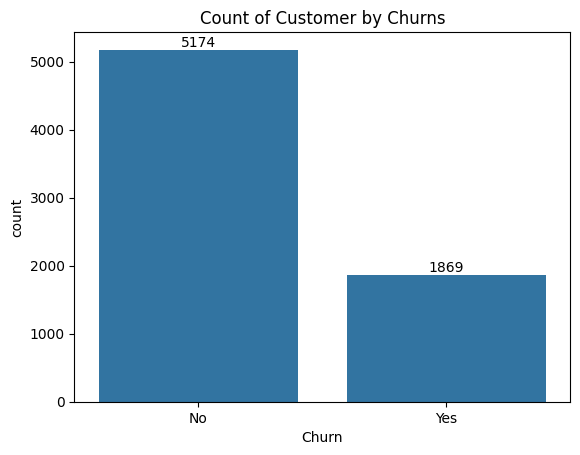

In [10]:
ax= sns.countplot(x= 'Churn' , data = df)

ax.bar_label(ax.containers[0])      #gives count on the top of bar
plt.title('Count of Customer by Churns')
plt.show()

#Out of the total customers, 1,869 (26.5%) have churned, while 5,174 (73.5%) have remained. This indicates a significant churn rate, which highlights the importance of understanding what drives customers to leave.


# Percentage of Churned Customers

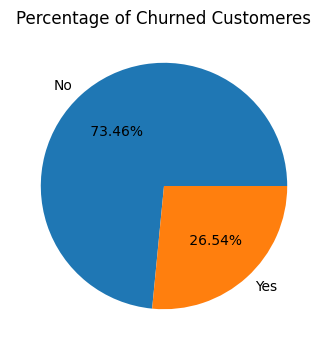

In [11]:
plt.figure(figsize = (4,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct =' %1.2f%%' )
plt.title('Percentage of Churned Customeres')
plt.show()

#From the given pie chart we can conclude that 26.54% of our customers have churned out. lets explore the reason behind it

# Churn based on the Gender of Customer

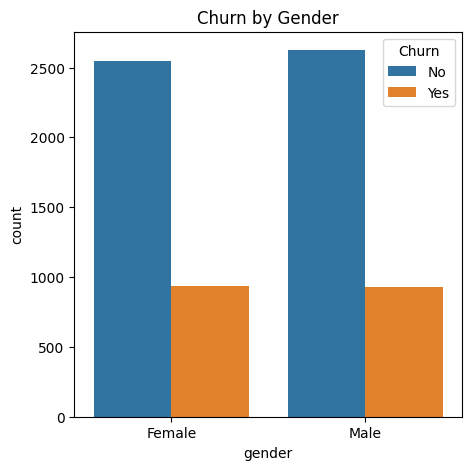

In [12]:
plt.figure(figsize = (5,5))
sns.countplot(x ='gender', data = df, hue = 'Churn')
plt.title('Churn by Gender')
plt.show()

#Both male and female customers show nearly identical churn behavior, with similar counts of churned and retained customers. This indicates that gender does not significantly impact customer churn in this dataset.


# Count of Churn based on Senior Citizen

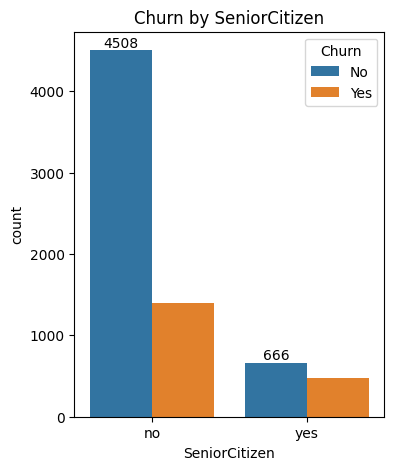

In [13]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x ='SeniorCitizen', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title('Churn by SeniorCitizen')
plt.show()

#Although the number of senior citizens is lower in the dataset, their churn rate appears relatively higher compared to non-senior customers. This suggests that **senior citizens may be more likely to churn**, and further analysis can help identify the reasons (e.g., pricing sensitivity, lack of digital support, etc.).


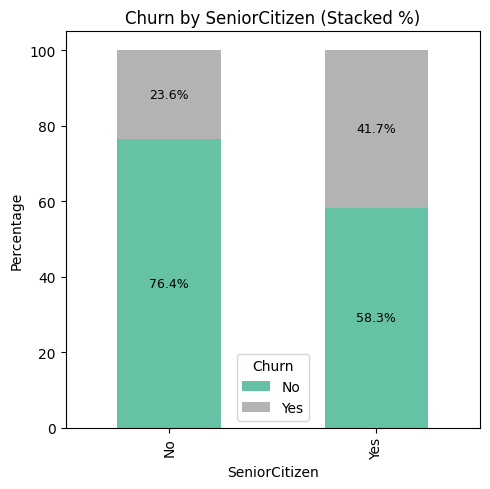

In [14]:

# Prepare crosstab of SeniorCitizen vs Churn
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Get percentage of each row (SeniorCitizen category)
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot as stacked bar chart
ax = ct_percent.plot(kind='bar', stacked=True, figsize=(5, 5), colormap='Set2')

# Add percentage text labels inside the bars
for idx, row in enumerate(ct_percent.values):
    cumulative = 0
    for i, val in enumerate(row):
        if val > 0:
            ax.text(idx, cumulative + val / 2, f'{val:.1f}%', 
                    ha='center', va='center', fontsize=9)
            cumulative += val

# Set axis labels and title
ax.set_title('Churn by SeniorCitizen (Stacked %)')
ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('Percentage')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])  # 0: Not Senior, 1: Senior
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


#comparative a greater precentage of people in senior citizen category have churned

# Histplot of Tenure 

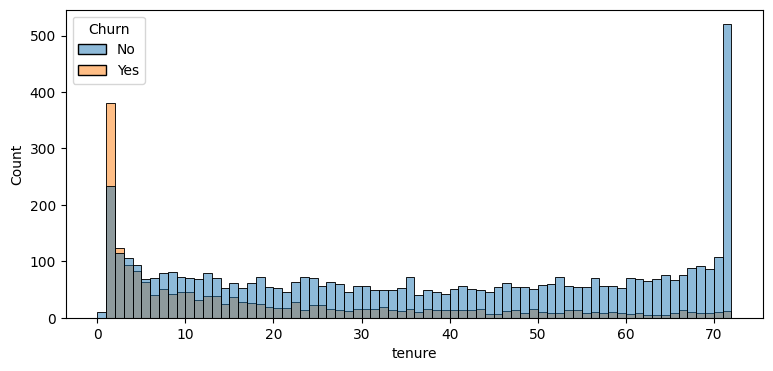

In [15]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df, bins = 72, hue = 'Churn')
plt.show()

#people who have used our services for long time have stayed and people who have used our services for 1 to 2 months have churned

# Churn by Contract

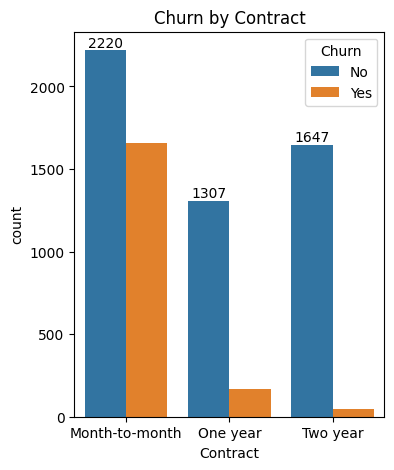

In [16]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x ='Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title('Churn by Contract')
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract

In [17]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Churn Distribution by Services Availed

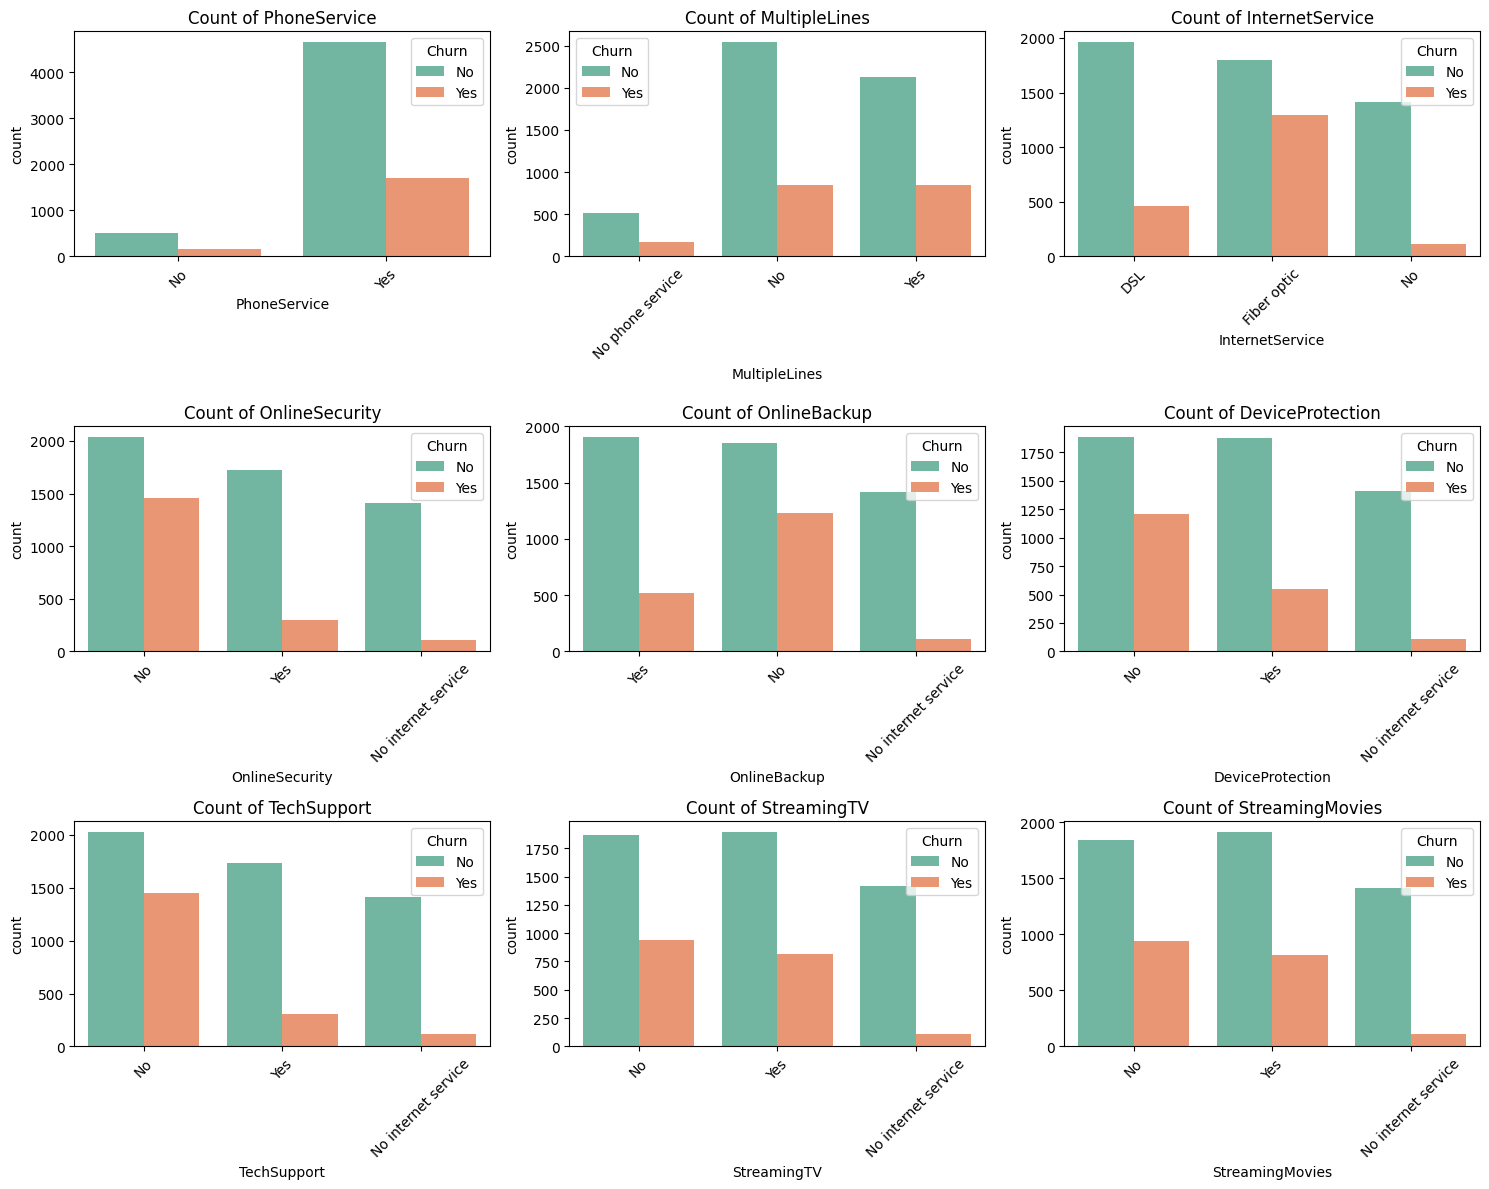

In [18]:
# List of columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up grid size (3 rows x 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Make axes iterable

# Create countplots for each column
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Set2', hue = df["Churn"])
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots (if any)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#Customers who do **not use optional services** such as **Online Security, Tech Support, Online Backup**, and **Streaming TV/Movies** show a **higher churn rate**. This suggests that customers who are less engaged with the company’s value-added services are more likely to leave. On the other hand, customers subscribed to multiple services (e.g., phone service, internet service) tend to stay longer, possibly due to higher dependency or bundled benefits.
#This insight can help businesses focus on **service bundling and customer engagement** to reduce churn.


# Churned Customers by Payment Method

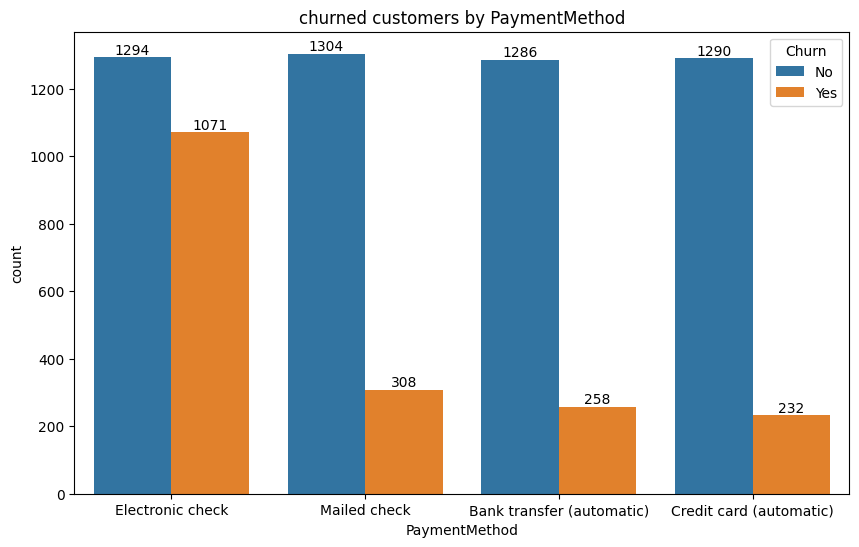

In [23]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x ='PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('churned customers by PaymentMethod')
plt.show()

#customers is likely to churn when he is using electronic check as method

## 📊 Conclusion & Key Insights

In [ ]:
""""
In this exploratory data analysis of the Telco Customer Churn dataset, we investigated various customer attributes and services to understand patterns related to churn. 

🔹 We observed that **contract type, tenure, monthly charges**, and **engagement with value-added services** like tech support and online security significantly impact churn behavior.  
🔹 Features like **gender and phone service** did not show strong correlation with churn.  
🔹 **Senior citizens** and **month-to-month contract users** were more likely to leave.  

These findings can help telecom companies identify at-risk customers and develop targeted retention strategies.

📌 This project strengthens my understanding of data cleaning, visualization, and business-oriented storytelling using Python.  
📈 Future work may include building a churn prediction model to automate churn identification and implement proactive customer support.

""""